In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 6s 1us/step


In [3]:
X_train.shape

(60000, 28, 28)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

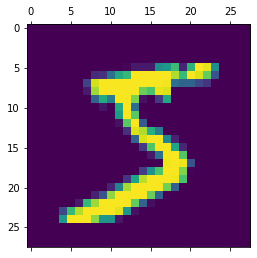

In [7]:
plt.matshow(X_train[0])

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, Y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4690 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9259


In [21]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2679 - accuracy: 0.9257


[0.26788049936294556, 0.9257000088691711]

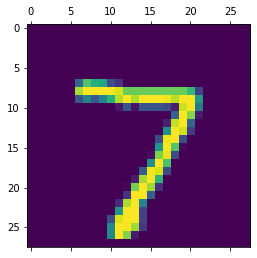

In [22]:
plt.matshow(X_test[0])

In [26]:
Y_predicted = model.predict(X_test_flattened)

In [27]:
Y_predicted[0]

array([1.6706496e-02, 2.3611240e-07, 6.9657654e-02, 9.5622504e-01,
       2.9900074e-03, 1.3126716e-01, 1.6551045e-06, 9.9977857e-01,
       1.0194364e-01, 6.2015998e-01], dtype=float32)

In [28]:
np.argmax(Y_predicted[0])

7

In [29]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    5,    8,    3,    2,    0],
       [   0, 1106,    3,    2,    0,    2,    4,    2,   16,    0],
       [   6,    7,  921,   16,    6,    6,   13,   11,   43,    3],
       [   3,    0,   18,  915,    0,   31,    2,   12,   23,    6],
       [   1,    1,    2,    1,  918,    0,   12,    4,   11,   32],
       [   8,    1,    3,   24,    8,  795,   13,    4,   30,    6],
       [   9,    3,    7,    1,    7,   16,  910,    2,    3,    0],
       [   1,    5,   23,    5,    8,    0,    0,  954,    4,   28],
       [   6,    2,    5,   19,    9,   30,   10,   11,  876,    6],
       [  10,    5,    1,   10,   32,   10,    0,   28,   10,  903]])>

Text(69.0, 0.5, 'Truth')

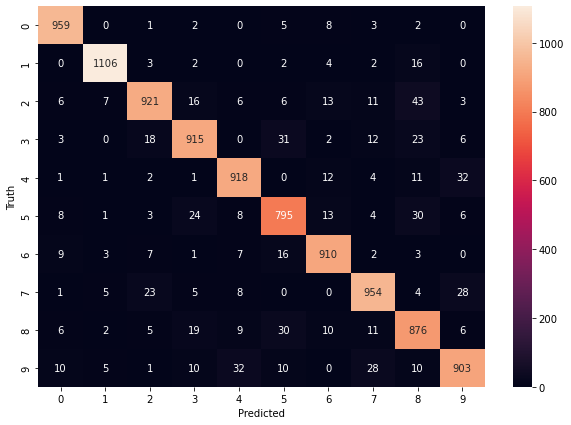

In [31]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, Y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2746 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1243 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9835


In [33]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 999us/step - loss: 0.0916 - accuracy: 0.9715


[0.09164754301309586, 0.9714999794960022]